# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [45]:
%matplotlib inline
import pandas as pd

condemnations = pd.read_csv('condemn.txt')
condemnations.shape

<ipython-input-45-4427bda89e9a>:4: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('condemn.txt')


(32586, 40)

In [46]:
import pandas as pd

# Load data with low_memory=False to avoid DtypeWarning
condemnations = pd.read_csv('condemn.txt', low_memory=False)

# Convert 'InspectDate' to datetime format for proper filtering
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'], errors='coerce')

# Filter data to include only dates between 1986 and 2014
condemnations = condemnations[(condemnations['InspectDate'] >= '1986-01-01') & (condemnations['InspectDate'] <= '2014-12-31')]

# Check shape
condemnations.shape

(30232, 40)

In [47]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [48]:
import pandas as pd
import numpy as np

# Load the data with low_memory=False to avoid DtypeWarning
condemnations = pd.read_csv('condemn.txt', low_memory=False)

# Convert 'InspectDate' to datetime, handling potential errors during conversion
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'], errors='coerce')

# Filter the data between 1986 and 2014, inclusive
condemnations = condemnations[(condemnations['InspectDate'] >= '1986-01-01') & (condemnations['InspectDate'] <= '2014-12-31')]

# Extract the year from InspectDate
condemnations['Year'] = condemnations['InspectDate'].dt.year

# Create the pivot table
by_year = pd.pivot_table(
    data=condemnations,
    index='Year',
    columns='Status',
    values='InspectDate',
    aggfunc=lambda x: np.ma.count(x)
)


# Reorder the columns to match the assertion
by_year = by_year[['B', 'L', 'R', 'W']]

In [49]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


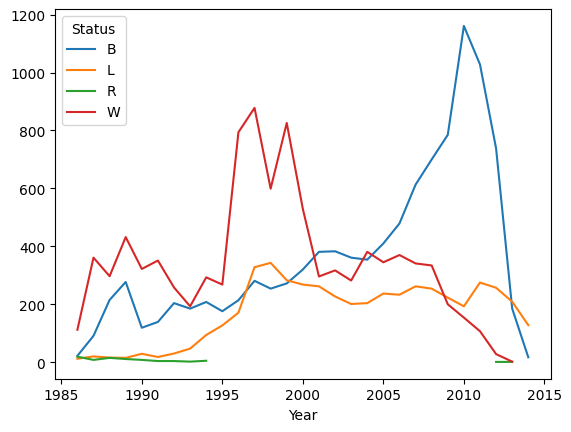

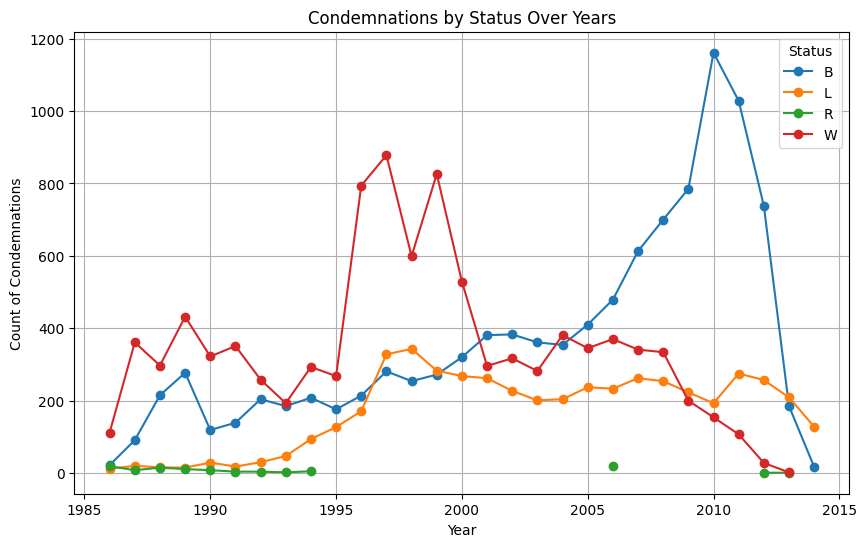

In [50]:
%matplotlib inline
by_year.plot()
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the by_year DataFrame
by_year.plot(figsize=(10, 6), marker='o')
plt.title("Condemnations by Status Over Years")
plt.xlabel("Year")
plt.ylabel("Count of Condemnations")
plt.legend(title="Status")
plt.grid(True)
plt.show()

---

The multi-series line chart you've created displays the trend of different Status types of condemnations over the years from 1986 to 2014. Here’s a brief analysis based on the chart:

Status B: There is a significant increase starting in the early 2000s, reaching a peak around 2010. After this peak, there’s a sharp decline.

Status W: This category shows a rise in the 1990s, peaks around 1995, and then steadily decreases afterward.

Status L: This category has been relatively steady over the years, with only minor fluctuations.

Status R: The count for this status remains very low throughout the period, indicating it is less common compared to other statuses.

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `/data/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [51]:
import pandas as pd
meetings = ...

import pandas as pd

# Assuming your data is in a CSV file named 'meetings_data.csv'
# Replace 'meetings_data.csv' with the actual path to your file
meetings = pd.read_csv('meetings.csv')

# Step 1: Create the startDate column containing only the date part
meetings['startDate'] = meetings['startTime'].str[0:10]

# Step 2: Create a new column to label the period as "BEFORE" or "DURING"
meetings['period'] = ''
meetings.loc[(meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] <= '2020-02-28'), 'period'] = 'BEFORE'
meetings.loc[(meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] <= '2020-03-27'), 'period'] = 'DURING'

# Filter the data to include only rows labeled as "BEFORE" or "DURING"
filtered_meetings = meetings[meetings['period'].isin(['BEFORE', 'DURING'])]

# Step 3: Pivot the data to get a summary of meetings by userName and period
by_person = filtered_meetings.pivot_table(index='userName', columns='period', values='meetingId', aggfunc='count', fill_value=0)

# Display the resulting DataFrame
by_person.reset_index(inplace=True)
print(by_person)

period                        userName  BEFORE  DURING
0                           Drew.Marco      12      19
1                          amit.bhagat      17      30
2       andrea.bryant.amitechsolutions       5       3
3                         angie.warren       5       9
4        chris.rogers.amitechsolutions       4       3
5                          eric.keeney      15      27
6                          eric.rodman       4      12
7       jeff.hatfield.amitechsolutions      13      26
8             jennifer.patton.amitechs       5       7
9                       jessica.sikora       3       7
10                         matt.allsup       5       0
11         matt.brown.amitechsolutions       1       2
12                       melissa.menne      10       9
13                       michael.demos       5      11
14                           paul.boal      15      35
15         paul.smith.amitechsolutions      23      10
16                       pete.cornwell       1       9
17        

In [52]:
summary = ...
summary = by_person  # Assign the by_person DataFrame to summary
# Rename columns
summary.rename(columns={'BEFORE': 'Before', 'DURING': 'During'}, inplace=True)

# Calculate percentage change and add it as a new column "pctChange"
# Using the formula (During - Before) / Before
summary['pctChange'] = ((summary['During'] - summary['Before']) / summary['Before']).fillna(0)

# Assert to verify the mean of "pctChange" rounds to 0.92
assert summary['pctChange'].mean().round(2) == 0.92, "The mean of pctChange is not 0.92"

# Display the updated summary DataFrame
summary

period,userName,Before,During,pctChange
0,Drew.Marco,12,19,0.583333
1,amit.bhagat,17,30,0.764706
2,andrea.bryant.amitechsolutions,5,3,-0.400000
3,angie.warren,5,9,0.800000
4,chris.rogers.amitechsolutions,4,3,-0.250000
5,eric.keeney,15,27,0.800000
6,eric.rodman,4,12,2.000000
7,jeff.hatfield.amitechsolutions,13,26,1.000000
8,jennifer.patton.amitechs,5,7,0.400000
9,jessica.sikora,3,7,1.333333


---

In [53]:
assert(len(summary) == 22)

In [54]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
